In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install opencv-python-headless
%pip install scikit-image

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# 1. 라이브러리 선언

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import cv2
import numpy as np
from skimage import feature, exposure
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import json
import matplotlib.pyplot as plt

# 데이터 준비


In [3]:
import os
import cv2
import json
import numpy as np
from sklearn.model_selection import train_test_split

# 이미지와 라벨링 데이터의 경로를 지정합니다.
image_data_folder = 'C:\\Users\\ewqds\\Documents\\Pill_Data\\1.Training\\image\\'
label_data_folder = 'C:\\Users\\ewqds\\Documents\\Pill_Data\\1.Training\\Label\\'

# 학습 및 테스트 데이터를 저장할 리스트를 생성합니다.
X = []  # 이미지 데이터
y = []  # 라벨 데이터
count = 0
# 이미지 폴더에서 파일 이름을 반복하여 데이터를 로드합니다.
for image_code_name in os.listdir(image_data_folder):
    count += 10
    # 이미지 파일의 전체 경로
    image_file_path = os.path.join(image_data_folder, image_code_name)
    label_file_path= os.path.join(label_data_folder, image_code_name)
    # print("ds: ", os.listdir(image_file_path))
    # print(os.listdir(label_file_path))
    print("===================", str(count) + "% 완료 ===================")
    for image in os.listdir(image_file_path):
        # 라벨 파일의 전체 image_label_path
        image_path = os.path.join(image_file_path,image)
        label_path = os.path.join(label_file_path, image[:-4]+'.json')
        
        # 이미지를 로드합니다. 
        image = cv2.imread(image_path)
        if image is None:
            print("못불러옴")  # 이미지를 로드하지 못한 경우 건너뜁니다.
        
        # 라벨 데이터를 로드합니다.
        with open(label_path, 'r') as label_file:
            label_data = json.load(label_file)
        
        # 라벨 데이터에서 분류 라벨을 추출합니다. (예: 'Normal' 또는 'Abnormal')
        label = label_data['annotations'][0]['category_id']
        #
        # JSON 라벨링 데이터 불러오기
with open(json_file_path, 'r') as file:
    labeling_data = json.load(file)

# 라벨링 데이터에서 경계 상자 좌표 추출
bbox = labeling_data['annotations'][0]['bbox']
x, y, w, h = bbox

# 이미지에서 알약 부분 잘라내기
pill_cropped = pill_image[y:y+h, x:x+w]

# 잘라낸 이미지의 크기를 확인하고, 필요한 경우 크기를 조정합니다.
pill_resized = cv2.resize(pill_cropped, (227, 227))


        # 이미지와 라벨을 리스트에 추가합니다.
        X.append(image)
        y.append(label)

# ss리스트를 numpy 배열로 변환합니다.
X = np.array(X)
y = np.array(y)

# # 데이터를 학습 및 테스트 세트로 분할합니다.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 이후 모델 학습 코드를 작성합니다.
# 예:
# model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

=================== 10% 완료 ===================
=================== 20% 완료 ===================
=================== 30% 완료 ===================
=================== 40% 완료 ===================
=================== 50% 완료 ===================


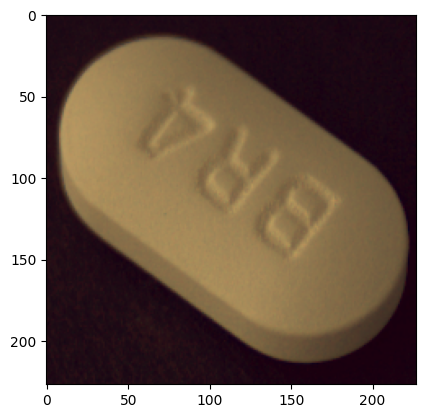

In [24]:
# 이미지를 로드합니다.
image_file_name = "K-001029_0_0_0_0_60_000_200"
pill_image = cv2.imread('C:\\Users\\ewqds\\Documents\\Pill_Data\\1.Training\\image\\K-001029\\'+ image_file_name + '.png', cv2.IMREAD_COLOR)
# 이미지가 성공적으로 불러와졌는지 확인
if pill_image is None:
    raise ValueError(f"이미지를 불러오는 데 실패했습니다.")

# Replace with the path to your JSON file
json_file_path = "C:\\Users\\ewqds\\Documents\\Pill_Data\\1.Training\\Label\\K-001029\\" + image_file_name + ".json"


# 잘라낸 알약 이미지를 시각화합니다.
plt.imshow(cv2.cvtColor(pill_resized, cv2.COLOR_BGR2RGB))
plt.show()

# 2. Data 전처리

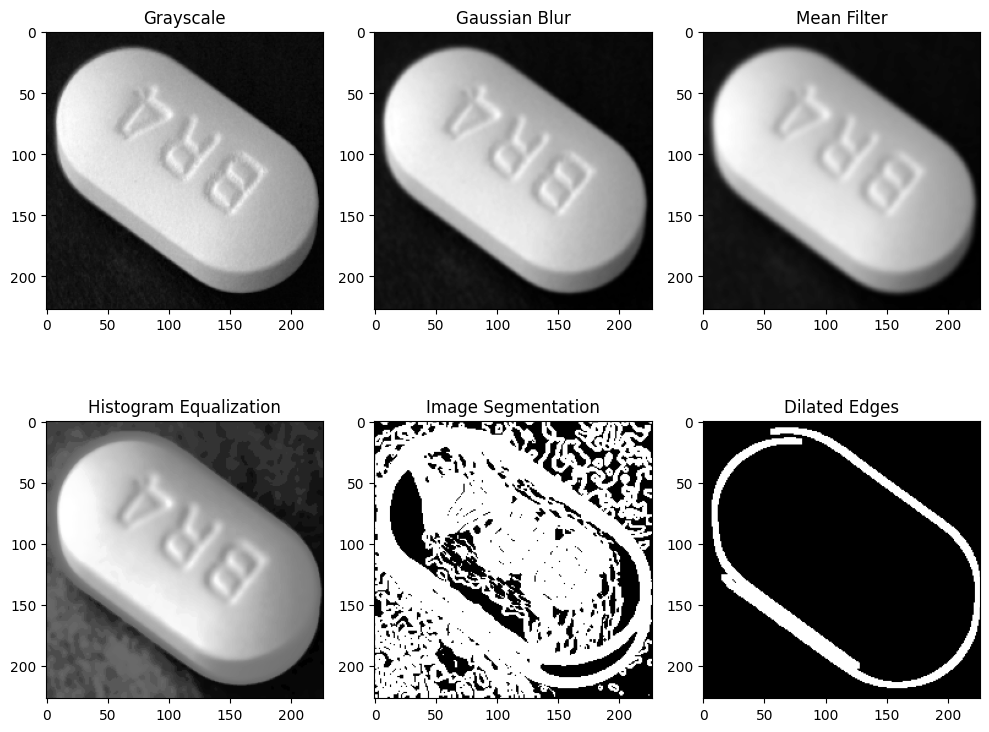

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 그레이스케일로 변환
gray_image = cv2.cvtColor(pill_resized, cv2.COLOR_BGR2GRAY)

# 노이즈 제거: 가우시안 블러
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# 이미지 평활화: 평균 필터
kernel = np.ones((5, 5), np.float32) / 25
smoothed_image = cv2.filter2D(blurred_image, -1, kernel)

# 명암 대비 정규화: 히스토그램 평활화
equalized_image = cv2.equalizeHist(smoothed_image)

# 에지 검출: 소벨 필터
sobelx = cv2.Sobel(equalized_image, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(equalized_image, cv2.CV_64F, 0, 1, ksize=5)
sobel_edges = cv2.magnitude(sobelx, sobely)

# Sobel 에지 결과를 8비트 이미지로 변환합니다.
sobel_edges_8u = cv2.convertScaleAbs(sobel_edges)

# 이미지 세분화: 이진화를 위해 8비트 이미지 사용
_, binary_image = cv2.threshold(sobel_edges_8u, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 에지 검출: 캐니 에지
canny_edges = cv2.Canny(equalized_image, 100, 200)

# 에지 확장: 이미지 확대 (Dilation)
dilation_kernel = np.ones((5, 5), np.uint8)
dilated_image = cv2.dilate(canny_edges, dilation_kernel, iterations=1)

# 결과 시각화
plt.figure(figsize=(10, 8))
plt.subplot(231), plt.imshow(gray_image, cmap='gray'), plt.title('Grayscale')
plt.subplot(232), plt.imshow(blurred_image, cmap='gray'), plt.title('Gaussian Blur')
plt.subplot(233), plt.imshow(smoothed_image, cmap='gray'), plt.title('Mean Filter')
plt.subplot(234), plt.imshow(equalized_image, cmap='gray'), plt.title('Histogram Equalization')
plt.subplot(235), plt.imshow(binary_image, cmap='gray'), plt.title('Image Segmentation')
plt.subplot(236), plt.imshow(dilated_image, cmap='gray'), plt.title('Dilated Edges')
plt.tight_layout()
plt.show()

In [19]:
# 이미지를 모델 입력 크기로 리사이즈합니다.
resized_images = [cv2.resize(img, (227, 227)) for img in [binary_image, dilated_image]]

# 이미지들을 하나의 배치로 결합합니다.
# 추가 차원을 추가하여 4D 텐서로 만듭니다: (samples, height, width, channels)
# 채널을 복사하여 3개로 만듦으로써 RGB 차원을 확장합니다.
batch_images = np.stack(resized_images, axis=0)
batch_images = np.repeat(batch_images, 3, axis=-1)

# Model 정의

In [20]:
# CNN 모델 정의
def create_cnn(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((3, 3), strides=(2, 2)),
        layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
        layers.MaxPooling2D((3, 3), strides=(2, 2)),
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((3, 3), strides=(2, 2)),
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# 모델 생성
input_shape = (227, 227, 3)  # 예시 입력 크기
num_classes = 2  # 올바른 약품 이미지, 잘못된 약품 이미지의 두 클래스
cnn_model = create_cnn(input_shape, num_classes)

# 컴파일 설정
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# 모델 요약
cnn_model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)     

# 학습

In [ ]:
# 모델 훈련
cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# 모델 평가
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)

# 예측
predictions = cnn_model.predict(X_test)

# 테스트(firebase storage에서 데이터 불러오기)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# 평가

In [ ]:
# 테스트 데이터셋에 대한 예측을 수행합니다.
y_pred = knn.predict(X_test_features)

# 분류 결과를 평가합니다.
print(classification_report(y_test, y_pred))